### Netflix Dataset

In [78]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from textblob import TextBlob
from wordcloud import WordCloud
import requests

In [2]:
#import dataset
NET_data = pd.read_csv(r"/content/netflix_data.csv")

In [3]:
#view data
NET_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### Getting to know the dataset
##### Data Wrangling

In [4]:
#The Head function
NET_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#The Tail function
NET_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
#The shape function shows the no. of rows and columns contained in this data
NET_data.shape

(8807, 12)

In [7]:
#The size function shows the size of the data
NET_data.size

105684

In [8]:
#This function is used to show the column name
NET_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
#datatypes
NET_data.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [10]:
#The info function
NET_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* From the row counts there are some null values in this dataset no. 3-6

### Data cleaning

#### Finding the duplicate records and null values

In [33]:
NET_data.duplicated() #function to find duplicate values

,0
0,False
1,False
2,False
3,False
4,False
...,...
8802,False
8803,False
8804,False
8805,False


* This function only retuned the top 5 rows and the bottom 5 rows its has not give the necessary information required to dictect the duplicate values in a dataset

In [34]:
NET_data[NET_data.duplicated()] #This fomular will only give data that contain duplicate values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description




* There are only 2 duplicats found in this data set



In [35]:
NET_data.drop_duplicates(inplace = True)
#this function removes duplicate values, using this alone 'NET_data.drop_duplicates()' cannot permanently remove the duplicte values, adding (inplace =true) will get it done

In [36]:
#verify that duplicate values has been removed
NET_data.shape

(8807, 12)

* Perviously the rows were 7789 in total now they are 7787.

#### Finding Null Values

In [37]:
#Using isnull function will return the a series of boolean values to confirm null areas
NET_data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
NET_data.isnull().sum() #this will generate the total of null values in the dataset

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


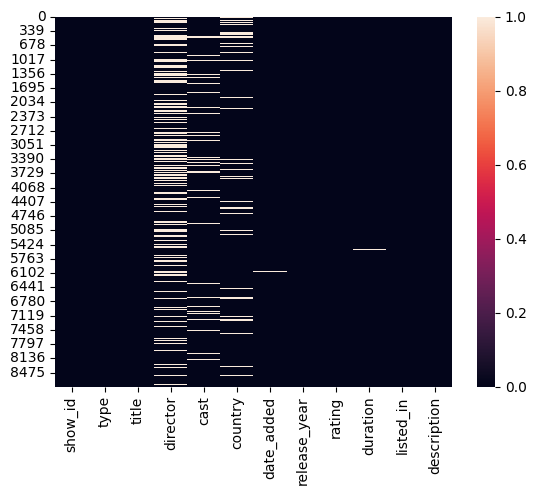

In [39]:
#using seaborn to vizualize the nullvalues in the data set
import matplotlib.pyplot as plt
sns.heatmap(NET_data.isnull())
plt.show()

In [40]:
NET_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [52]:
NET_data.sort_values(by = 'release_year', ascending = False).head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."
765,s766,Movie,Xtreme,Daniel Benmayor,"Teo García, Óscar Jaenada, Óscar Casas, Andrea...",Spain,"June 4, 2021",2021,TV-MA,112 min,"Action & Adventure, International Movies","In this fast-paced and action-packed thriller,..."
766,s767,Movie,Alan Saldaña: Locked Up,Alex Díaz,Alan Saldaña,Mexico,"June 3, 2021",2021,TV-MA,49 min,Stand-Up Comedy,"Mexican comedian Alan Saldaña is back, poking ..."
767,s768,TV Show,Creator's File: GOLD,NaN,"Ryuji Akiyama, Ryusei Yokohama, Yumi Adachi, A...",Japan,"June 3, 2021",2021,TV-14,1 Season,"International TV Shows, TV Comedies",Comedian Ryuji Akiyama satirizes top “creators...
768,s769,Movie,Dancing Queens,Helena Bergström,"Molly Nutley, Fredrik Quiñones, Marie Göranzon...",Sweden,"June 3, 2021",2021,TV-MA,111 min,"Comedies, Dramas, International Movies",A dancer who gets a job cleaning at a struggli...
770,s771,Movie,Myriam Fares: The Journey,Myriam Fares,Myriam Fares,United Arab Emirates,"June 3, 2021",2021,TV-14,72 min,"Documentaries, International Movies, Music & M...","From pregnancy to album preparations, Lebanese..."


 #### Top 10 Most Common Words in Show Titles

In [55]:
# Combine all titles into a single text
all_titles = ' '.join(NET_data['title'].dropna())

In [58]:
# Count the most common words
word_counts = Counter(all_titles.split())
common_words = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False).head(10)

<ipython-input-59-6ab17c5b6e68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_words['Word'], y=common_words['Count'], palette='coolwarm')


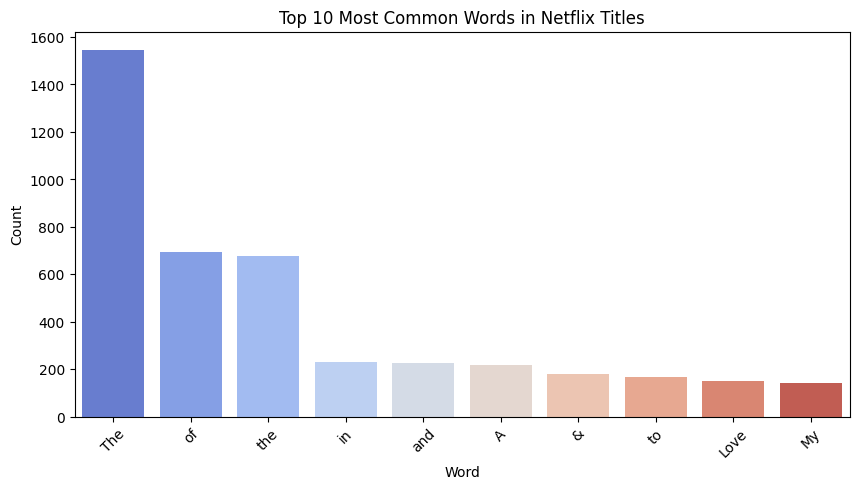

In [59]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=common_words['Word'], y=common_words['Count'], palette='coolwarm')
plt.title("Top 10 Most Common Words in Netflix Titles")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Top 5 Directors with Most Titles on Netflix

In [60]:
top_directors = NET_data['director'].dropna().value_counts().head(5)

<ipython-input-61-c5f50365b017>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='Blues_r')


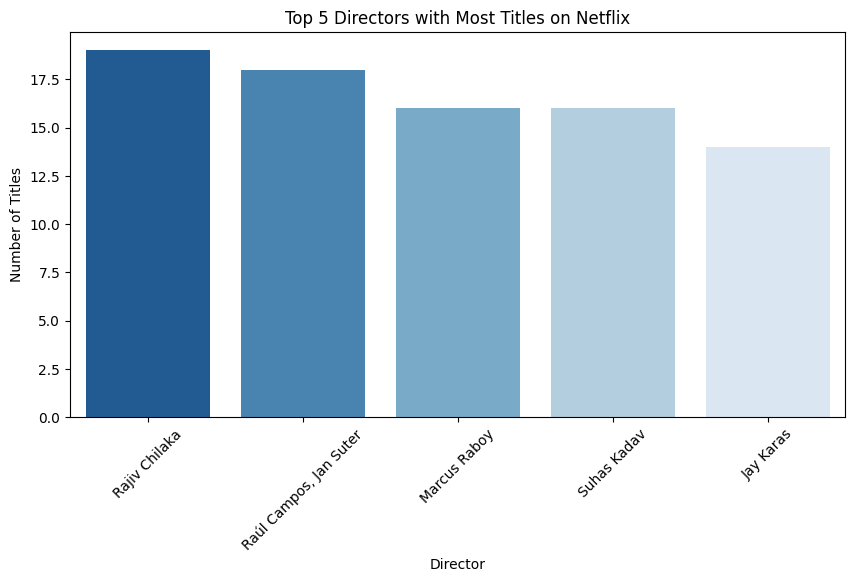

In [61]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='Blues_r')
plt.title("Top 5 Directors with Most Titles on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

#### Most Popular Content Genre Over Time

In [62]:
# Explode genres into separate rows
df_exploded = NET_data.assign(listed_in=NET_data['listed_in'].str.split(', ')).explode('listed_in')

In [63]:
# Count by release year
genre_trends = df_exploded.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

In [64]:
# Pivot for heatmap
pivot = genre_trends.pivot(index='release_year', columns='listed_in', values='count').fillna(0)


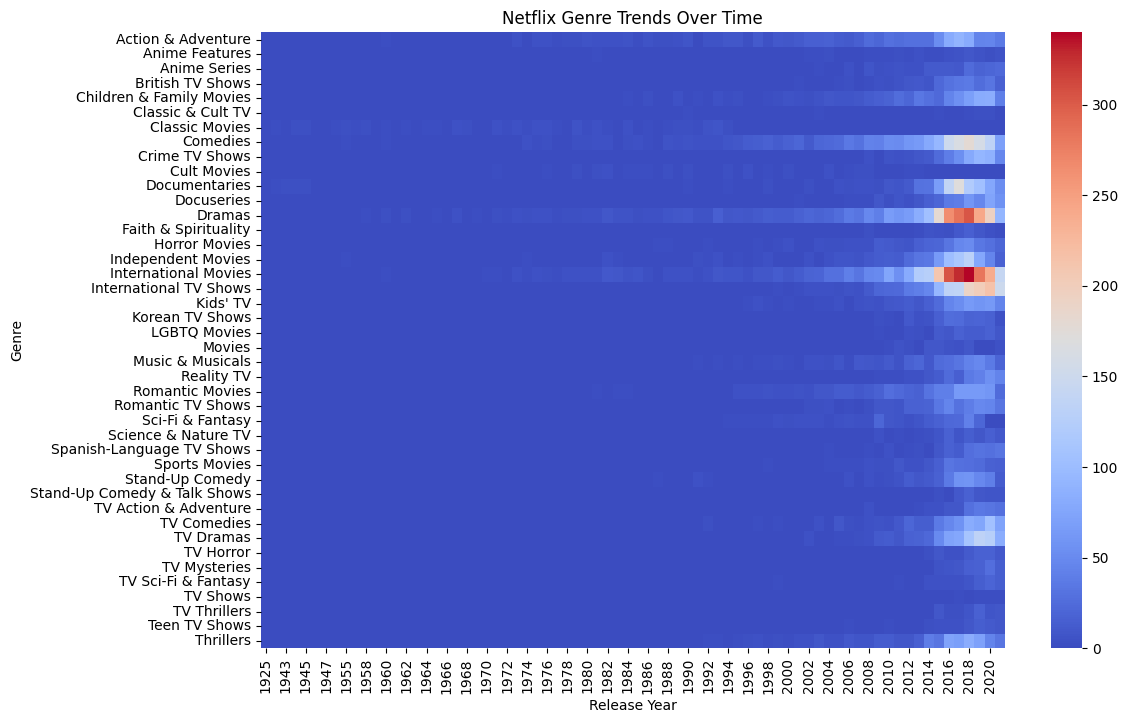

In [65]:
# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(pivot.T, cmap="coolwarm", cbar=True)
plt.title("Netflix Genre Trends Over Time")
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.show()

#### Movie vs TV Show Duration Distribution

In [66]:
# Separate Movies and TV Shows
movies = NET_data[NET_data['type'] == 'Movie']
tv_shows = NET_data[NET_data['type'] == 'TV Show']

In [67]:
# Convert movie duration to numeric
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)

<ipython-input-67-c93297fbcde1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)


In [68]:
# Convert TV show seasons to numeric
tv_shows['duration'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)


<ipython-input-68-e56d1b403250>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)


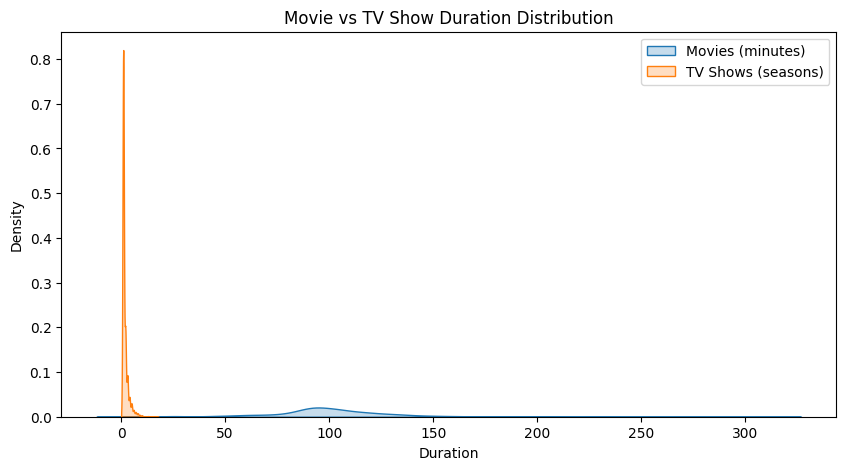

In [70]:
# Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(movies['duration'].dropna(), label="Movies (minutes)", fill=True)  # Updated
sns.kdeplot(tv_shows['duration'].dropna(), label="TV Shows (seasons)", fill=True)  # Updated
plt.title("Movie vs TV Show Duration Distribution")
plt.xlabel("Duration")
plt.legend()
plt.show()

#### Sentiment Analysis of Movie & TV Show Titles

In [72]:
# Function to analyze sentiment
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

In [73]:
# Apply sentiment analysis
NET_data['title_sentiment'] = NET_data['title'].apply(get_sentiment)

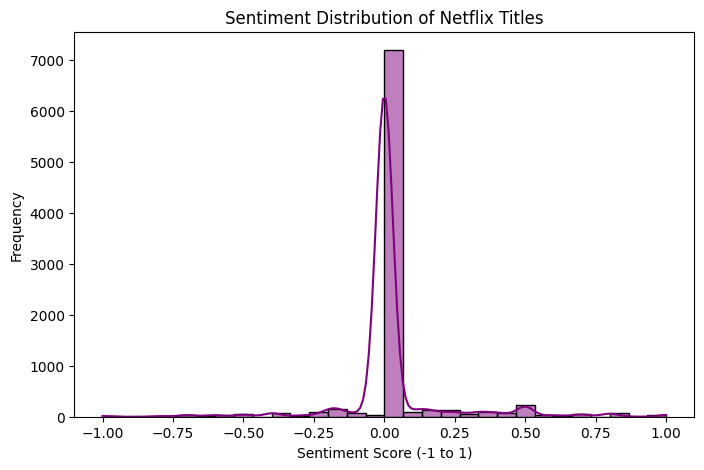

In [74]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(NET_data['title_sentiment'], bins=30, kde=True, color='purple')
plt.title("Sentiment Distribution of Netflix Titles")
plt.xlabel("Sentiment Score (-1 to 1)")
plt.ylabel("Frequency")
plt.show()

#### Are Netflix Shows Getting Shorter or Longer?

In [75]:
# Convert duration column for analysis
movies = NET_data[NET_data['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)

<ipython-input-75-67f3adda81d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)


In [76]:
# Group by release year
duration_trend = movies.groupby('release_year')['duration'].mean()

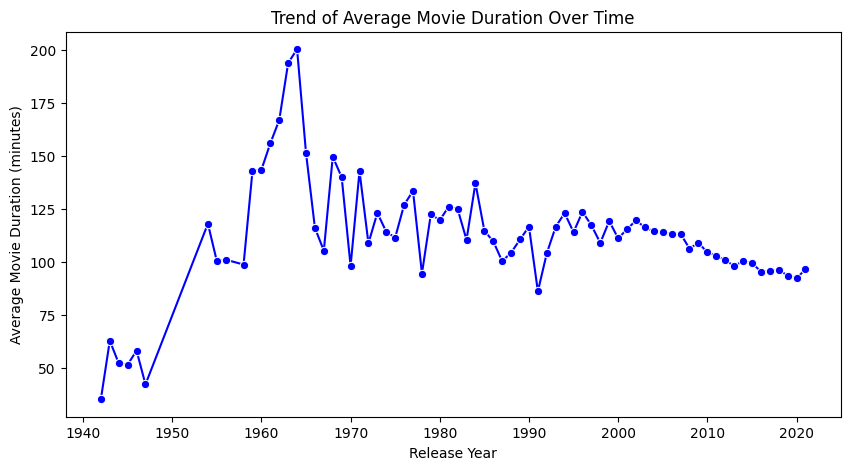

In [77]:
# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=duration_trend.index, y=duration_trend.values, color="blue", marker="o")
plt.title("Trend of Average Movie Duration Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Movie Duration (minutes)")
plt.show()

#### Word Cloud of Netflix Show Titles

In [79]:
# Combine all titles into one string
title_text = " ".join(NET_data['title'].dropna())

In [80]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Set2").generate(title_text)

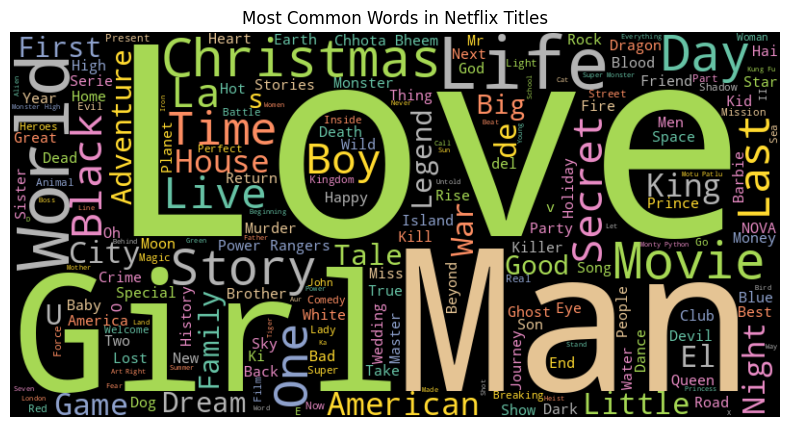

In [81]:
# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Netflix Titles")
plt.show()

#### Country-Specific Content Trends

In [82]:
# Split multiple country entries
country_data = NET_data.assign(country=NET_data['country'].str.split(', ')).explode('country')

In [83]:
# Count titles per country
top_countries = country_data['country'].value_counts().head(10)

<ipython-input-84-f4751f211c99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="Reds_r")


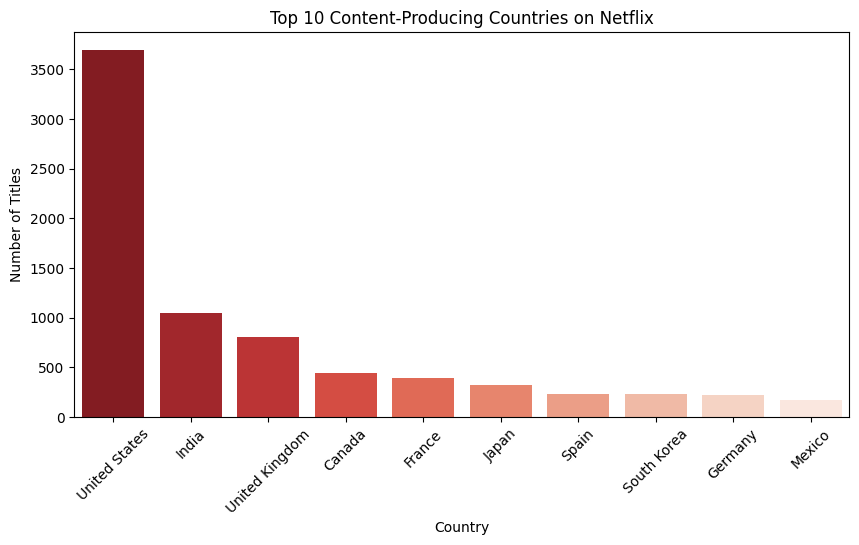

In [84]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Reds_r")
plt.xticks(rotation=45)
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()